## Observations and Insights 

In [54]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study = mouse_metadata.merge(study_results, on = "Mouse ID", how = 'outer') 
mouse_study.head()

# Display the data table for preview


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [55]:
# Checking the number of mice.
number_mice = len(mouse_study['Mouse ID'].unique())
number_mice

249

In [56]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupes = mouse_study[mouse_study.duplicated(['Mouse ID', 'Timepoint'])]
print(dupes['Mouse ID'])

909    g989
911    g989
913    g989
915    g989
917    g989
Name: Mouse ID, dtype: object


In [57]:
# Optional: Get all the data for the duplicate mouse ID. 
print(dupes)


    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1  


In [58]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
new_dataframe = mouse_study[mouse_study['Mouse ID'] != 'g989']
new_dataframe.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [59]:
# Checking the number of mice in the clean DataFrame.
mouse_num_new = len(new_dataframe['Mouse ID'].unique())
mouse_num_new

248

## Summary Statistics

In [60]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_mean = new_dataframe.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
drug_median = new_dataframe.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
drug_variance = new_dataframe.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
drug_std = new_dataframe.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
drug_sem = new_dataframe.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
# This method is the most straighforward, creating multiple series and putting them all together at the end.



In [61]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_stats = pd.DataFrame({'mean':drug_mean,
                          'median':drug_median,
                          'variance':drug_variance,
                          'standard deviation':drug_std,
                          'SEM':drug_sem})
drug_stats

# This method produces everything in a single groupby function


,mean,median,variance,standard deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Number of Mice')

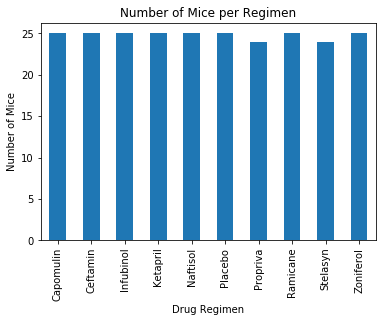

In [62]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mice_per_drug = new_dataframe.groupby('Drug Regimen')['Mouse ID'].nunique()
mice_per_drug
drugs = mice_per_drug.index
mice_per_drug_df = pd.DataFrame(mice_per_drug)
Mice_bar = mice_per_drug_df.plot.bar(y="Mouse ID", title='Number of Mice per Regimen',legend=None)
Mice_bar.set_ylabel("Number of Mice")

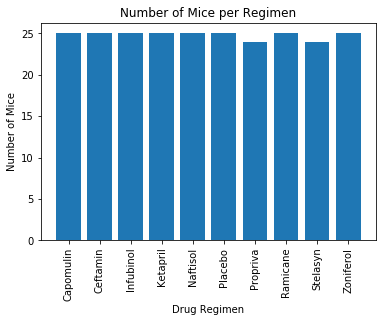

In [63]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
plt.bar(drugs,mice_per_drug)
plt.xticks(rotation='vertical')
plt.ylabel('Number of Mice')
plt.xlabel('Drug Regimen')
plt.title('Number of Mice per Regimen')
plt.show()



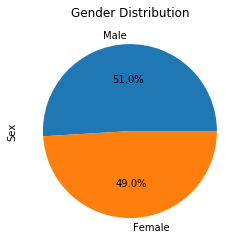

In [64]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
Sex = new_dataframe['Sex'].value_counts()
Sex.plot.pie(autopct='%1.1f%%', title='Gender Distribution')



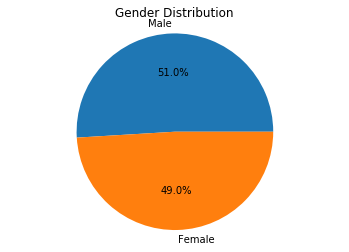

In [65]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = ['Male', 'Female']
plt.pie(Sex, labels=labels, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Gender Distribution')
plt.show()

## Quartiles, Outliers and Boxplots

In [66]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
regimen_4 = new_dataframe.loc[(new_dataframe['Drug Regimen']=='Capomulin')|
                             (new_dataframe['Drug Regimen']=='Ramicane')|
                              (new_dataframe['Drug Regimen']=='Infubinol')|
                             (new_dataframe['Drug Regimen']=='Ceftamin')]
# Start by getting the last (greatest) timepoint for each mouse
#Sort the data by Mouse ID and Timepoint, with highest timepoint ranked top

regimen4_sort=regimen_4.sort_values(['Mouse ID','Timepoint'], ascending=False)
#Keep only the first entry and drop the rest to get the final tumor volume of each mouse with each regimen
last_time_points=regimen4_sort.drop_duplicates(subset=['Mouse ID'])
last_time_points



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1872,z581,Infubinol,Female,24,25,45,62.754451,3
84,z578,Ramicane,Male,11,16,45,30.638696,0
1855,y865,Ceftamin,Male,23,26,45,64.729837,3
124,y793,Capomulin,Male,17,17,45,31.896238,2
1845,y769,Ceftamin,Female,6,27,45,68.594745,4
...,...,...,...,...,...,...,...,...
430,a444,Ramicane,Female,10,25,45,43.047543,0
327,a411,Ramicane,Male,3,22,45,38.407618,1
493,a275,Ceftamin,Female,20,28,45,62.999356,3
473,a251,Infubinol,Female,21,25,45,65.525743,1


In [67]:
# Put treatments into a list for for loop (and later for plot labels)
Treatments = last_time_points['Drug Regimen'].unique()

outlier = []
for x in Treatments:
    Drug_x = last_time_points.loc[(last_time_points['Drug Regimen']==x)]
    quartiles = Drug_x['Tumor Volume (mm3)'].quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    Drug_x_out = Drug_x.loc[(Drug_x['Tumor Volume (mm3)'] > upper_bound) |
                           (Drug_x['Tumor Volume (mm3)'] < lower_bound)]
    outlier.append(Drug_x_out)
outlier

#so there is one outlier in "Infubinol"

[    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
 669     c326    Infubinol  Female          18          25          5   
 
      Tumor Volume (mm3)  Metastatic Sites  
 669           36.321346                 0  ,
 Empty DataFrame
 Columns: [Mouse ID, Drug Regimen, Sex, Age_months, Weight (g), Timepoint, Tumor Volume (mm3), Metastatic Sites]
 Index: [],
 Empty DataFrame
 Columns: [Mouse ID, Drug Regimen, Sex, Age_months, Weight (g), Timepoint, Tumor Volume (mm3), Metastatic Sites]
 Index: [],
 Empty DataFrame
 Columns: [Mouse ID, Drug Regimen, Sex, Age_months, Weight (g), Timepoint, Tumor Volume (mm3), Metastatic Sites]
 Index: []]

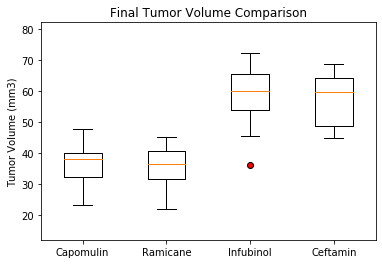

In [70]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
Capomulin = last_time_points.loc[(last_time_points['Drug Regimen']=='Capomulin'), 'Tumor Volume (mm3)']
Ramicane = last_time_points.loc[(last_time_points['Drug Regimen']=='Ramicane'), 'Tumor Volume (mm3)']
Infubinol = last_time_points.loc[(last_time_points['Drug Regimen']=='Infubinol'), 'Tumor Volume (mm3)']
Ceftamin = last_time_points.loc[(last_time_points['Drug Regimen']=='Ceftamin'), 'Tumor Volume (mm3)']

labels = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
red_dot = dict(markerfacecolor='r', marker='o')
data = [Capomulin, Ramicane, Infubinol, Ceftamin]
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume Comparison')
ax1.boxplot(data, labels=labels, flierprops=red_dot)
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.set_ylim(min(last_time_points['Tumor Volume (mm3)'])-10,max(last_time_points['Tumor Volume (mm3)']+10))

plt.show()

## Line and Scatter Plots

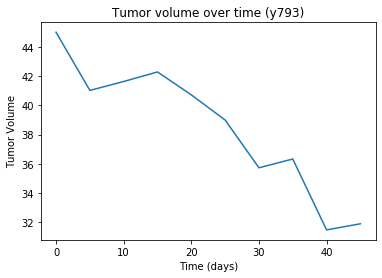

In [77]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
cap_mouse_time = new_dataframe.loc[(new_dataframe['Mouse ID']=='y793'), 'Timepoint']
cap_mouse_tumor = new_dataframe.loc[(new_dataframe['Mouse ID']=='y793'), 'Tumor Volume (mm3)']
plt.plot(cap_mouse_time,cap_mouse_tumor)
plt.xlabel('Time (days)')
plt.ylabel('Tumor Volume')
plt.title('Tumor volume over time (y793)')
plt.show()

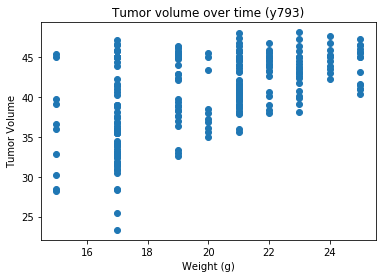

In [81]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
cap_mouse_weight = new_dataframe.loc[(new_dataframe['Drug Regimen']=='Capomulin'), 'Weight (g)']
cap_mouse_tumor = new_dataframe.loc[(new_dataframe['Drug Regimen']=='Capomulin'), 'Tumor Volume (mm3)']
plt.scatter(cap_mouse_weight,cap_mouse_tumor)
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume')
plt.title('Tumor volume over time (y793)')
plt.show()

## Correlation and Regression

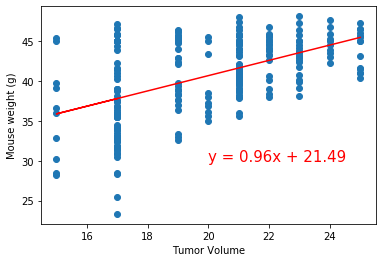

In [86]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

(slope, intercept, rvalue, pvalue, stderr) = linregress(cap_mouse_weight, cap_mouse_tumor)
regress_values = cap_mouse_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(cap_mouse_weight,cap_mouse_tumor)
plt.plot(cap_mouse_weight,regress_values, 'r-')
plt.annotate(line_eq,(20,30),fontsize=15,color="red")
plt.xlabel('Tumor Volume')
plt.ylabel('Mouse weight (g)')
plt.show()

#OMG it's finally over!